In [5]:
import re
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
import matplotlib.cm as cm

%matplotlib inline

In [6]:
names = ['id','category']
for i in range(1,301):
    names.append(str(i))

# Load text description vectors
descriptions = pd.read_csv('data/description_vecs.csv',names=names)

In [7]:
# Downsample data 
X = descriptions

X_reduced = pd.DataFrame()
for i in range(0,len(X)):
    if (i%100==0):
        X_reduced = pd.concat([X_reduced, X[i:i+1]])

X=X_reduced

In [8]:
Xvec = X[X.columns[2:302]]
Xlab = X[X.columns[0:2]]
c = pd.factorize(Xlab['category'])[0]

In [9]:
# T-SNE dimensionality reduction
X_embedded = TSNE(n_components=2, verbose=2, metric='precomputed').fit_transform(Xvec)
plt.scatter(X_embedded[:,0], X_embedded[:,1], color=cm.jet(c))


ValueError: X should be a square distance matrix

In [2]:
# Truncated SVD then TSNE
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=1)
X_tsvd = svd.fit_transform(Xvec) 

X_embedded = TSNE(n_components=2, verbose=2).fit_transform(X_tsvd)

plt.scatter(X_embedded[:,0], X_embedded[:,1], color=cm.jet(c))

NameError: name 'Xvec' is not defined

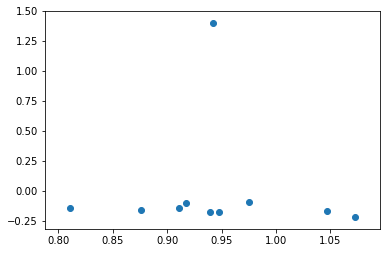

In [121]:
# Visualize just one category
Xtees = X[X.category==' tees']
Xtees = Xtees[Xtees.columns[2:302]]
# newX_embedded = TSNE(n_components=2, verbose=2, metric='cosine').fit_transform(Xtees)
# plt.scatter(newX_embedded[:,0], newX_embedded[:,1])

svd = TruncatedSVD(n_components=2, n_iter=7, random_state=0)
newX_embedded = svd.fit_transform(Xtees) 
plt.scatter(newX_embedded[:,0], newX_embedded[:,1])